# Proyek Analisis Data: Nama dataset
- Nama: Nabil Abdurrahman
- Email: nabilabdurrahman10@gmail.com
- Id Dicoding: nbilabd

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berdasarkan musim dan hari dalam seminggu?
- Bagaimana pola peminjaman yang berdasarkan dengan kondisi cuaca?
- Bagaimana pengelompokan sederhana berdasarkan rentang suhu ?

## Menyaipkan semua library yang dibuthkan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import files

## Data Wrangling


### Gathering Data

In [5]:
# Upload file 'csv'
uploaded = files.upload()

Saving day.csv to day.csv


### Assessing Data

Lihat sekilas dataset dan informasi dasar:

In [7]:
nama_file = 'day.csv'
# Membaca dataset menjadi DataFrame
bike_data = pd.read_csv(nama_file)

bike_data.head()  # Melihat lima baris pertama dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
bike_data.info()  # Informasi tentang dataset, jenis data, dan nilai yang hilang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

Pembersihan Data

In [14]:
bike_data['dteday'] = pd.to_datetime(bike_data['dteday']) #Ubah tipe data kolom dateday menjadi tipe data datetime.
bike_data.isnull().sum()  # mengecek jumlah nilai yang hilang pada setiap kolom
bike_data.dropna(inplace=True)  # menghapus baris dengan nilai yang hilang
bike_data.drop_duplicates(inplace=True) #menghapus data duplikat

 Pemilihan Kolom yang Dibutuhkan

In [18]:
selected_columns = ['dteday', 'season', 'weekday', 'weathersit', 'temp', 'cnt']  # Pilih kolom yang ingin digunakan
bike_data = bike_data[selected_columns]  # Filter dataset hanya dengan kolom yang terpilih
bike_data = bike_data.sort_values(by='dteday')  # Mengurutkan berdasarkan kolom 'dteday'


## Exploratory Data Analysis (EDA)

Tren Peminjaman Sepeda Berdasarkan Musim dan Hari dalam Seminggu

In [21]:
trend_by_season_weekday = bike_data.groupby(['season', 'weekday'])['cnt'].mean()
print(trend_by_season_weekday)

season  weekday
1       0          2229.444444
        1          2452.730769
        2          2792.520000
        3          2611.080000
        4          2894.200000
        5          2856.307692
        6          2432.333333
2       0          4986.538462
        1          4565.000000
        2          4824.961538
        3          4835.074074
        4          5200.269231
        5          5222.769231
        6          5334.192308
3       0          5324.269231
        1          5627.192308
        2          5656.111111
        3          5853.851852
        4          5698.607143
        5          5750.629630
        6          5584.962963
4       0          4451.961538
        1          4698.846154
        2          4658.923077
        3          4766.800000
        4          4730.880000
        5          4898.680000
        6          4906.040000
Name: cnt, dtype: float64


Pola peminjaman yang berdasarkan dengan kondisi cuaca?

In [24]:
pola_cuaca = bike_data.groupby('weathersit')['cnt'].mean()
print(pola_cuaca)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


 Pengelompokan Berdasarkan Rentang Suhu

In [26]:
# Membuat kategori berdasarkan rentang suhu
def kategori_suhu(temp):
    if temp*41 < 10:
        return 'Dingin'
    elif 10 <= temp*41 < 20:
        return 'Sejuk'
    elif 20 <= temp*41 < 30:
        return 'Hangat'
    else:
        return 'Panas'

# Menambahkan kolom kategori suhu ke dalam dataset
bike_data['temp_category'] = bike_data['temp'].apply(kategori_suhu)

# Menampilkan jumlah peminjaman berdasarkan kategori suhu
jumlah_peminjaman_per_kategori = bike_data.groupby('temp_category')['cnt'].sum()
print(jumlah_peminjaman_per_kategori)

temp_category
Dingin     100666
Hangat    1698506
Panas      389517
Sejuk     1103990
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana tren peminjaman sepeda berdasarkan musim dan hari dalam seminggu?

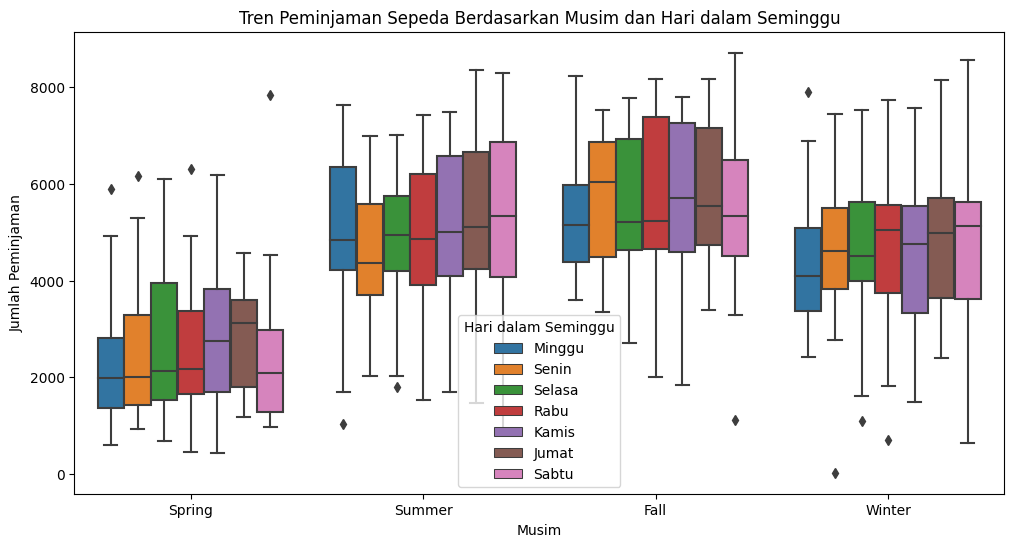

In [37]:
# Membuat mapping untuk label musim dan hari dalam seminggu
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weekday_map = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

# Mengganti nilai dalam kolom dengan label yang sudah ditentukan
bike_data['season_label'] = bike_data['season'].map(season_map)
bike_data['weekday_label'] = bike_data['weekday'].map(weekday_map)

plt.figure(figsize=(12, 6))
sns.boxplot(x='season_label', y='cnt', data=bike_data, hue='weekday_label', hue_order=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.title('Tren Peminjaman Sepeda Berdasarkan Musim dan Hari dalam Seminggu')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Hari dalam Seminggu')
plt.show()


### Pertanyaan 2: Bagaimana pola peminjaman yang berdasarkan dengan kondisi cuaca?


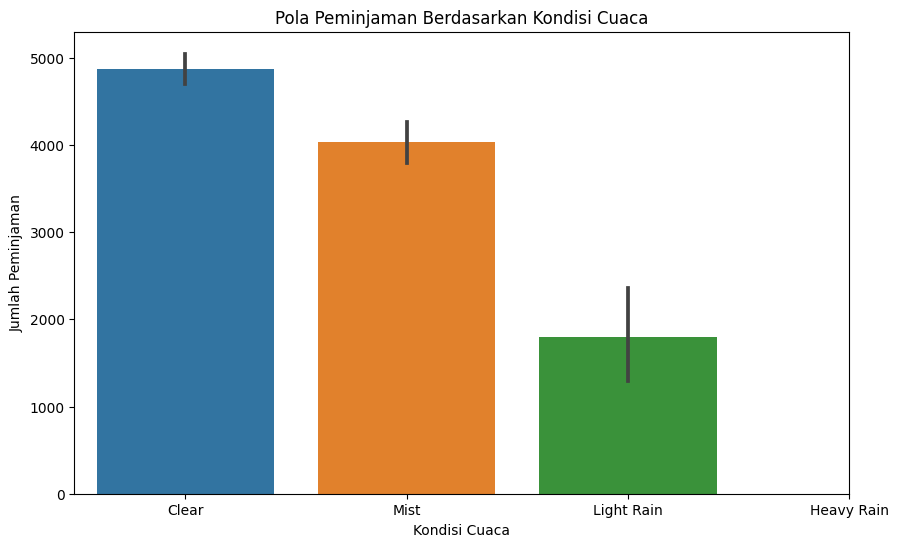

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=bike_data)
plt.title('Pola Peminjaman Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.show()


### Pertanyaan 3: Bagaimana pengelompokan peminjaman berdasarkan rentang suhu ?

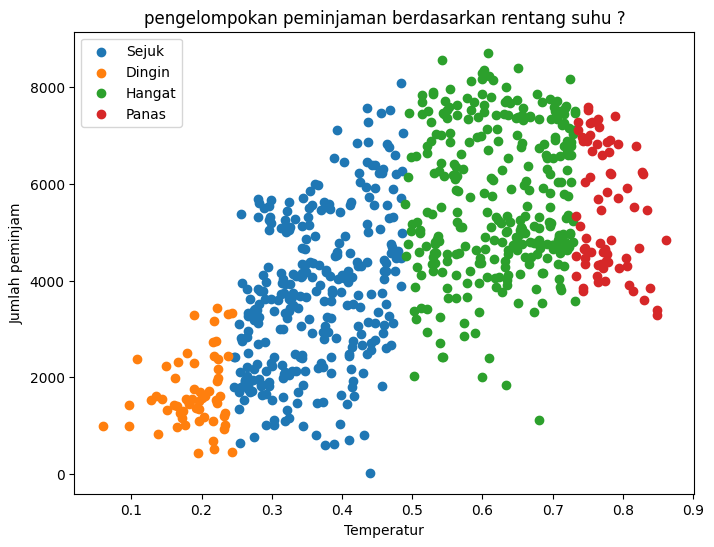

In [52]:
# Membuat scatter plot dengan pengelompokan berdasarkan kategori suhu
plt.figure(figsize=(8, 6))

# Scatter plot untuk setiap kategori suhu
for category in bike_data['temp_category'].unique():
    temp_subset = bike_data[bike_data['temp_category'] == category]
    plt.scatter(temp_subset['temp'], temp_subset['cnt'], label=category)

plt.xlabel('Temperatur')
plt.ylabel('Jumlah peminjam')
plt.title('pengelompokan peminjaman berdasarkan rentang suhu ?')
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1:  Bagaimana tren peminjaman sepeda berdasarkan musim dan hari dalam seminggu?

Peminjaman sepeda cenderung meningkat dari musim Spring ke Summer, mencapai puncaknya di Fall , dan turun sedikit di Winter .Tren ini menunjukkan bahwa musim Fall menjadi periode dengan peminjaman sepeda tertinggi, diikuti oleh Summer, dan Winter memiliki peminjaman yang lebih rendah. Dengan rata-rata  peningkatan dari hari Minggu ke hari Jumat, mencapai puncaknya pada hari Jumat, kemudian sedikit menurun pada hari Sabtu.Peningkatan dari hari Minggu ke hari Jumat menunjukkan bahwa peminjaman cenderung meningkat menjelang akhir pekan dan menurun sedikit pada hari Sabtu.

- Conclution pertanyaan 2:Bagaimana pola peminjaman yang berdasarkan dengan kondisi cuaca?

Pada kondisi cuaca yang cerah, peminjaman sepeda mencapai rata-rata tertinggi , diikuti oleh kondisi kabut. Saat terjadi hujan, baik hujan ringan maupun lebat, terjadi penurunan drastis dalam peminjaman sepeda.Pada hujan lebat bahkan tidak ada sama sekali peminjaman

- Conclutio Pertanyaan 3: Bagaimana pengelompokan peminjaman berdasarkan rentang suhu ?

Pada kondisi suhu sedang yakni diantara 10-25 derajat selsius, merupakan suhu dimana peminjaman tertinggi. Untuk suhu dingin dan panas, peminjam tergolong cukup rendah.

